In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
from matplotlib.colors import LightSource
from tabulate import tabulate
from time import perf_counter
from sklearn.datasets import load_breast_cancer
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MultipleLocator
from sklearn.model_selection import train_test_split
from time import perf_counter
from sklearn.preprocessing import LabelBinarizer
import random
import pandas as pd
import seaborn as sns
import math
import matplotlib.colors

def plot_matriz_confusion(axes,TP=0,FN=0,FP=0,TN=0,fontsize=15):
    success_color=matplotlib.colors.to_rgb('#9EE548')
    failure_color=matplotlib.colors.to_rgb("#C32240")
    axes.imshow([[success_color,failure_color],[failure_color,success_color]])
    labels = ['Positivo','Negativo']
    xaxis = np.arange(len(labels))
    axes.set_xticks(xaxis)
    axes.set_yticks(xaxis)
    axes.set_xticklabels(labels, fontsize=13, color="#003B80")
    axes.set_yticklabels(labels, fontsize=13, color="#003B80")
    axes.text(0, 0, str(TP)+" TP",ha="center", va="center", color="#0A2102",fontsize=fontsize)
    axes.text(0, 1, str(FP)+" FP",ha="center", va="center", color="#FAEAEA",fontsize=fontsize) 
    axes.text(1, 0, str(FN)+" FN",ha="center", va="center", color="#FAEAEA",fontsize=fontsize)
    axes.text(1, 1, str(TN)+" TN",ha="center", va="center", color="#0A2102",fontsize=fontsize)         
    axes.xaxis.tick_top()
    axes.set_xlabel('Predicción', fontsize=fontsize, color="#003B80") 
    axes.xaxis.set_label_position('top') 
    axes.set_ylabel('Realidad', fontsize=fontsize, color="#003B80") 

Verdaderos Positivos= 8
Verdaderos Negativos= 4
Falsos Positivos= 3
Falsos Negativos= 5


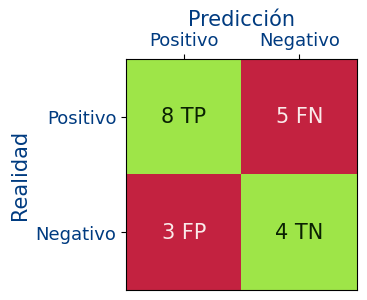

In [11]:
#Ejercicio 1
print("Verdaderos Positivos=",8)
print("Verdaderos Negativos=",4)
print("Falsos Positivos=",3)
print("Falsos Negativos=",5)


figure=plt.figure(figsize=(3, 3)) 
axes=figure.add_subplot(1,1,1)
plot_matriz_confusion(axes,TP=8,FN=5,FP=3,TN=4)




In [55]:
#Ejercicio 2.A

y_pred=np.array([0.27, 0.45,  0.76,  0.55,  0.28, 0.04, 0.34, 0.66, 0.88, 0.94])
y_pred=y_pred>0.5

print(y_pred)

[False False  True  True False False False  True  True  True]


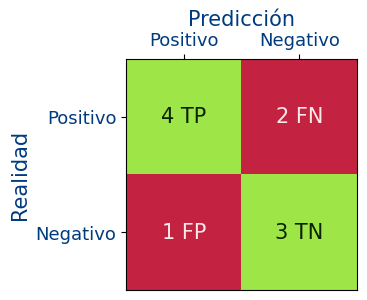

In [57]:
#Ejercicio 2.B

y_pred=np.array([0.27, 0.45,  0.76,  0.55,  0.28, 0.04, 0.34, 0.66, 0.88, 0.94])
y_pred=y_pred>0.5
y_true=np.array([1,0,1,1,0,0,1,0,1,1])

TP=sum((y_true==1) & (y_pred==1))
TN=sum((y_true==0) & (y_pred==0))
FN=sum((y_true==1) & (y_pred==0))
FP=sum((y_true==0) & (y_pred==1))


figure=plt.figure(figsize=(3, 3)) 
axes=figure.add_subplot(1,1,1)
plot_matriz_confusion(axes,TP=TP,FN=FN,FP=FP,TN=TN)


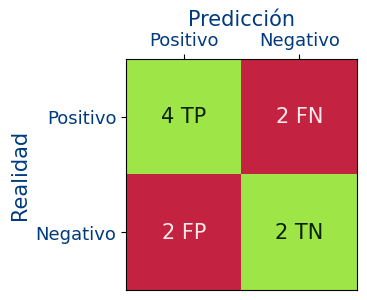

In [58]:
#Ejercicio 2.C


y_pred=np.array([0.27, 0.45,  0.76,  0.55,  0.28, 0.04, 0.34, 0.66, 0.88, 0.94])
y_pred=y_pred>0.4
y_true=np.array([1,0,1,1,0,0,1,0,1,1])

TP=sum((y_true==1) & (y_pred==1))
TN=sum((y_true==0) & (y_pred==0))
FN=sum((y_true==1) & (y_pred==0))
FP=sum((y_true==0) & (y_pred==1))


figure=plt.figure(figsize=(3, 3)) 
axes=figure.add_subplot(1,1,1)
plot_matriz_confusion(axes,TP=TP,FN=FN,FP=FP,TN=TN)




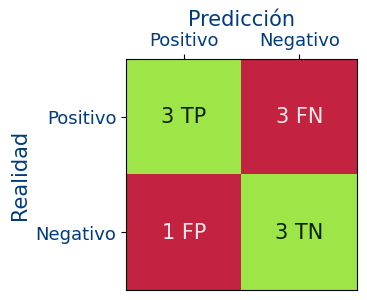

In [53]:
#Ejercicio 2.D


y_pred=np.array([0.27, 0.45,  0.76,  0.55,  0.28, 0.04, 0.34, 0.66, 0.88, 0.94])
y_pred=y_pred>0.6
y_true=np.array([1,0,1,1,0,0,1,0,1,1])

TP=sum((y_true==1) & (y_pred==1))
TN=sum((y_true==0) & (y_pred==0))
FN=sum((y_true==1) & (y_pred==0))
FP=sum((y_true==0) & (y_pred==1))


figure=plt.figure(figsize=(3, 3)) 
axes=figure.add_subplot(1,1,1)
plot_matriz_confusion(axes,TP=TP,FN=FN,FP=FP,TN=TN)

In [60]:
#Ejercicio 2.E


y_pred=np.array([0.27, 0.45,  0.76,  0.55,  0.28, 0.04, 0.34, 0.66, 0.88, 0.94])
y_pred=y_pred>0.5
y_true=np.array([1,0,1,1,0,0,1,0,1,1])

TP=sum((y_true==1) & (y_pred==1))
TN=sum((y_true==0) & (y_pred==0))
FN=sum((y_true==1) & (y_pred==0))
FP=sum((y_true==0) & (y_pred==1))

accuracy=(TP+TN)/(TP+TN+FP+FN)
precision=TP/(TP+FP)
recall_sensitivity=TP/(TP+FN)
negative_predictive_value=TN/(TN+FN)
f1_score=2/((1/recall_sensitivity)+(1/precision))

print(f"Accuracy={accuracy:0.2f}")
print(f"Precision={precision:0.2f}")
print(f"Recall o Sensitivity={recall_sensitivity:0.2f}")
print(f"Negative Predictive Value={negative_predictive_value:0.2f}")
print(f"F1-score={f1_score:0.2f}")

Accuracy=0.70
Precision=0.80
Recall o Sensitivity=0.67
Negative Predictive Value=0.60
F1-score=0.73
